<a href="https://colab.research.google.com/github/vanessaaleung/visualizations/blob/master/kardashians/kardashians.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd

In [18]:
trends = pd.read_csv('https://raw.githubusercontent.com/vanessaaleung/visualizations/master/kardashians/trends_kj_sisters.csv')
trends.head()

,Month,Kim Kardashian: (Worldwide),Khloé Kardashian: (Worldwide),Kourtney Kardashian: (Worldwide),Kendall Jenner: (Worldwide),Kylie Jenner: (Worldwide)
0,2007-01,2,<1,<1,<1,2
1,2007-02,12,<1,<1,<1,2
2,2007-03,9,<1,<1,<1,1
3,2007-04,6,<1,<1,<1,1
4,2007-05,6,<1,<1,<1,2


## Data Cleaning

In [19]:
trends.columns = ["month", "kim", "khloe", "kourtney", "kendall", "kylie"]

In [20]:
for col in trends.columns:
    if '<' in trends[col].to_string():
        trends[col] = trends[col].str.replace('<', '')
        trends[col] = pd.to_numeric(trends[col])

In [21]:
trends['month'] = pd.to_datetime(trends['month'])
trends = trends.set_index('month')

## Analysis

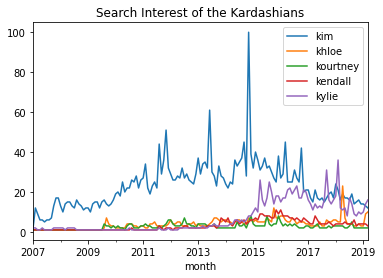

In [22]:
%matplotlib inline
trends.plot(title='Search Interest of the Kardashians')

Kim's <a href="https://en.wikipedia.org/wiki/Kim_Kardashian#2007%E2%80%932009:_Breakthrough_with_reality_television">sharp rise in 2007</a>, with the beginning of <a href="https://en.wikipedia.org/wiki/Keeping_Up_with_the_Kardashians"><em>Keeping Up with the Kardashians</em></a>, among other things. There was no significant search interest for the other four sisters until mid-2009 when Kourtney and Khloé launched the reality television series, <a href="https://en.wikipedia.org/wiki/Kourtney_and_Kim_Take_Miami"><em>Kourtney and Khloé Take Miami</em></a>. Then there was Kim's rise from famous to <a href="https://trends.google.com/trends/explore?date=all&geo=US&q=%2Fm%2F0261x8t,%2Fm%2F0d05l6">literally more famous than God</a> in 2011. This Cosmopolitan <a href="https://www.cosmopolitan.com/uk/entertainment/a12464842/who-is-kim-kardashian/">article</a> covers the timeline that includes the launch of music videos, fragrances,  iPhone and Android games, another television series, joining Instagram, and more. Then there was Kim's ridiculous spike in December 2014: posing naked on the cover of Paper Magazine in a bid to break the internet will do that for you.</p>

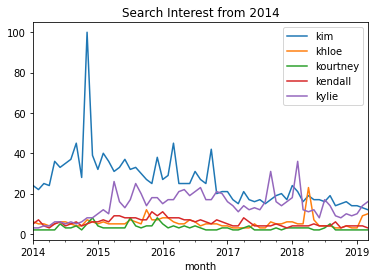

In [23]:
trends.loc['2014-01-01':].plot(title='Search Interest from 2014')


<p>It looks like my suspicion may be true: Kim is not always the most searched Kardashian or Jenner sister. Since late-2016, at various months, Kylie overtakes Kim. Two big spikes where she smashed Kim's search interest: in September 2017 when it was reported that Kylie was expecting her first child with rapper <a href="https://en.wikipedia.org/wiki/Travis_Scott">Travis Scott</a> and in February 2018 when she gave birth to her daughter, Stormi Webster. The continued success of Kylie Cosmetics has kept her in the news, not to mention making her the "The Youngest Self-Made Billionaire Ever" <a href="https://www.forbes.com/sites/natalierobehmed/2019/03/05/at-21-kylie-jenner-becomes-the-youngest-self-made-billionaire-ever/#57e612c02794">according to Forbes</a>.</p>
<p>These fluctuations are descriptive but do not really help us answer our question: is Kim even the most famous sister anymore? We can use rolling means to smooth out short-term fluctuations in time series data and highlight long-term trends. Let's make the window twelve months a.k.a. one year.</p>

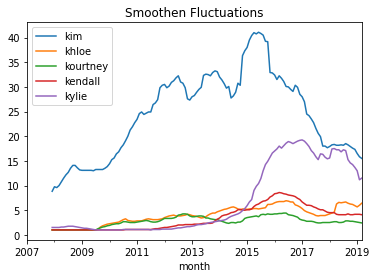

In [24]:
trends.rolling(window=12).mean().plot(title='Smoothen Fluctuations')

<p>Whoa, okay! So by this metric, Kim is still the most famous sister despite Kylie being close and nearly taking her crown. Honestly, the biggest takeaway from this whole exercise might be Kendall not showing up that much. It makes sense, though, despite her <a href="http://time.com/money/5033357/kendall-jenner-makes-more-than-gisele-bundchen/">wildly successful modeling career</a>. Some have called her "<a href="https://www.nickiswift.com/5681/kendall-jenner-normal-one-family/">the only normal one in her family</a>" as she tends to shy away from the more dramatic and controversial parts of the media limelight that generate oh so many clicks.</p>
<p>Let's end this analysis with one last plot. In it, we will plot (pun!) the Kardashian sisters against the Jenner sisters to see which family line is more popular now. We will use average search interest to make things fair, i.e., total search interest divided by the number of sisters in the family line.</p>
<p>Since 2015, it has been a toss-up. And in the future? With this family and their penchant for big events, who knows?</p>

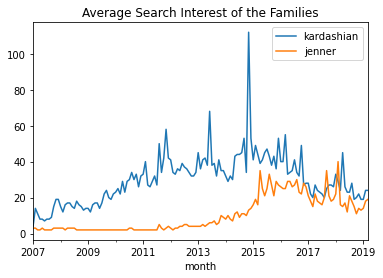

In [26]:
trends['kardashian'] = trends.kim + trends.khloe + trends.kourtney
trends['jenner'] = trends.kendall + trends.kylie

trends[['kardashian', 'jenner']].plot(title='Average Search Interest of the Families')